




<br><br><br>
<h2><font color="#004D7F" size=5>MUII</font></h2>



<h1><font color="#004D7F" size=6>Análisis de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Maite Alonso</font><br>
<font color="#004D7F" size=3>Máster universitario en ingeniería informática</font><br>
<font color="#004D7F" size=3>Universidad de Castilla-La Mancha</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Banco de datos marathon](#section1)
* [2. Análisis numérico de variables](#section2)
* [3. Representación gráfica de variables](#section3)
    * [Relación entre variables](#section3A)
    * [Análisis por sexos](#section3B)


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Banco de datos marathon</font>

El banco de datos marathon contiene los tiempos de todos los ganadores de la maratón de Nueva York desde 1970 hasta 1999.
Las variables del banco de datos son:
 - Year, año de la carrera.
 - Gender, sexo del ganador m=male, f=female.
 - Time, tiempo en horas del ganador.
 
Este banco de datos está en formato texto separado por tabuladores.
Comenzaremos importando los paquetes que necesitamos, pandas y cargando el banco de datos.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

#cargo los datos
df = pd.read_csv("./marathon.txt",sep='\t')
df.head()

C:\Users\garci\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Year,Gender,Time
0,1980,m,2.16139
1,1981,m,2.13694
2,1982,m,2.15806
3,1983,m,2.14972
4,1984,m,2.24806


Una vez tenemos los dato hay que clasificar las variables:
    - Year, es una variable cuantitativa discreta.
    - Gender es una variable cualitativa.
    - Time es una variable cuantitativa continua.

Hacemos un resumen numérico de las variables para ver en que rango se mueven, si hay un outlier o dato atípico.

<a id="section2"></a>
# <font color="#004D7F"> 2. Análisis numérico de las variables</font>

In [2]:
df.describe()

,Year,Time
count,59.000000,59.000000
mean,1984.745763,2.390504
std,8.591482,0.240691
min,1970.000000,2.133610
25%,1977.500000,2.183470
50%,1985.000000,2.421390
75%,1992.000000,2.470140
max,1999.000000,3.144720


Aquí tenemos un resumen numérico de las variables cuantitativas Year y Time. 

Por el resumen, podemos decir que tenemos 59 observaciones.

La media de la variable Time es 2.39, luego podemos decir que los ganadores/as de la marathon lo finalizan en 2.39 horas en media. La variable Year, tiene de media 1984.74. Esta variable representa los años y en este caso la media de años no tiene sentido o interpretación en este contexto.

La desviación en la variable Time es de 0.24 horas, luego hay una desviación de 24 minutos.

El valor mínimo de la variable Time es 2.13 y el máximo es de 3.14, hay una diferencia de una hora entre el que hizo el mejor tiempo y el peor. Esta diferencia es muy grande. Pero se tiene que tener en cuenta que estos tiempos es de hombres y mujeres, por tanto el análisis habría que hacerlo segmentado por sexos. Tal y como lo haremos en las siguientes secciones.

Para ver si hay algún dato atípico nos fijamos en el máximo y el mínimo de cada variable. 

Si está dentro del rango aceptable de medida o no lo está. Por ejemplo, una maratón se corre en unas dos hora y media,más o menos, para hombres, si es un profesional o un amateur muy experimentado. Si observaramos que el valor máximo de la variable Time fuera un número mayor de dos horas y media, es porque o bien el dato es erroneo, nos hemos equivocado al introducir el número, o el aparato que mide esa variable, el cronómetro, está fallando o realmente es un outlier.

Por tanto es importante fijarnos en el rango de las variables y ver si están dentro de lo esperado.

<a id="section3"></a>
# <font color="#004D7F"> 3. Representación gráfica de las variables</font>

Vamos a representar la variable Time mediante un histograma, ya que es una variable continua.

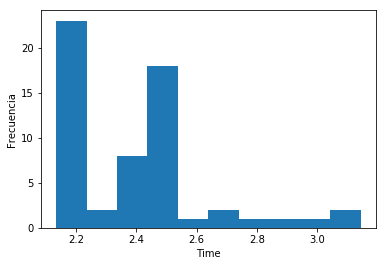

In [7]:
pl.figure(1)
pl.hist(df.Time)
pl.xlabel('Time')
pl.ylabel('Frecuencia')
pl.show()

Si nos fijamos en la distribución de la variable Time, podemos decir que es bimodal. Tiene dos modas. Esto es debido a que la variable Time recoge los tiempos de los ganadores hombres y mujeres.
Y en ella podemos ver el tiempo que los hombres que ganaron suelen hacerlo en 2.2 horas, mientras que las mujeres lo hacen en 2.5 horas.

<a id="section3A"></a> 
## <font color="#004D7F" size=4> 3.1 Relación entre variables  </font>

Si representamos la variable Time y Year, en un diagrama de dispersión. 

Podemos ver que por cada año tenemos dos valores, correspondientes a los tiempo de los ganadores hombre y mujer respectivamente.

A parte, se pude apreciar como a lo largo del tiempo la marca ha ido descendiendo hasta un valor ,más o menso, de 2.2 para los hombres y 2.5 para las mujeres.

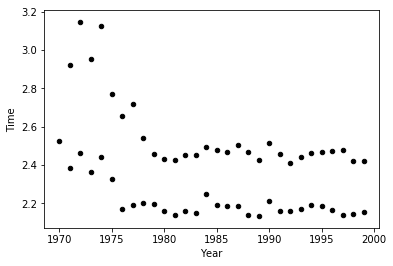

In [9]:
pl.figure(2)
pl.scatter(df.Year, df.Time, s=20, marker='o', color='k')
pl.xlabel('Year')
pl.ylabel('Time')
pl.show()

<a id="section3B"></a> 
## <font color="#004D7F" size=4> 3.2 Análisis por sexo </font>

Ahora vamos a analizar el tiempo por sexo.

Para ello vamos a separar la variable Time en dos, el tiempo de los chicos y el de las chicas.

Y para comparar las distribuciones, utilizamos un diagrama de cajas.

C:\Users\MariaTeresa.Alonso\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


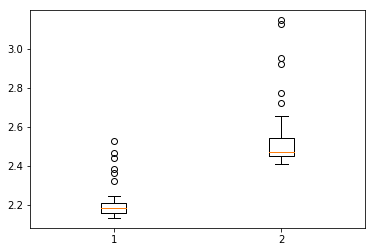

In [14]:
chicas=df.Time[df.Gender=="f"]
chicos=df.Time[df.Gender=="m"]
data=[chicos,chicas]
pl.figure(3)
pl.boxplot(data)
pl.show()

A la vista del diagram de cajas del tiempo entre hombres y mujeres. Podemos decir que los hombres realizan la carrera en menos tiempo.

En los tiempos de llegada de las mujeres hay más dispersión que ne la de los hombres. Por ser la caja más alargada.

Vemos una serie de outliers tanto en hombres como en mujeres, esto es de ganadores de algún año que hicieron tiempos muy alejados del resto. Puede ser que sean de ganadarores de los primeros años, cuando las técnicas de correr no estaban muy estudiadas o puede ser de algún año en el que las condiciones meteorológicas no hayan acompañado y esto ha hecho que se corra más lento.

In [20]:
chicas.describe(),chicos.describe()

(count    29.000000
 mean      2.566216
 std       0.212445
 min       2.411110
 25%       2.450000
 50%       2.468610
 75%       2.541670
 max       3.144720
 Name: Time, dtype: float64, count    30.000000
 mean      2.220648
 std       0.107551
 min       2.133610
 25%       2.157850
 50%       2.183470
 75%       2.208955
 max       2.527220
 Name: Time, dtype: float64)

Si hacemso un análisis numérico, vemos que las mujeres realizan la marathon en 2.5 horas en media , mientras que los hombres lo hacen en 2.22.

La desviación de las mujeres, 0.21, es mayor que la de los hombres, 0.10. Lo cual queiere decir que entre los ganadores hombres no hay tanta diferencia de tiempos como entre las ganadoras mujeres.

La mitad de los ganadores hombres lo hicieron en 2.18 y las mujeres en 2.46 horas. Esto es la mediana o percentil 50%